In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA** (Exploratory Data Analysis)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_datasets/heart_2020_cleaned.csv')

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
data.shape

(319795, 18)

In [8]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**Ploting some graphs to understand the dataset**

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64


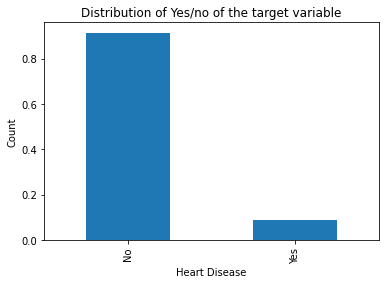

In [10]:
data['HeartDisease'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Yes/no of the target variable', xlabel='Heart Disease', ylabel='Count')
print(data['HeartDisease'].value_counts(normalize=True))

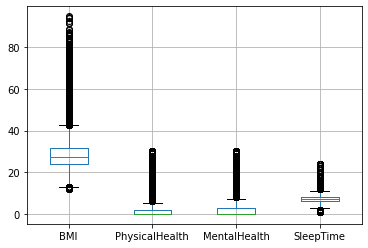

In [11]:
data[['BMI','PhysicalHealth','MentalHealth','SleepTime']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa120b72a10>,
      dtype=object)

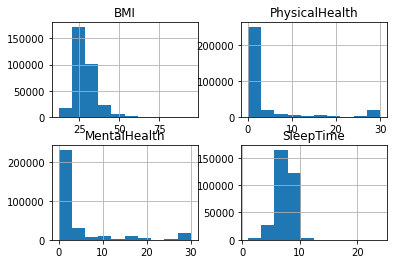

In [12]:
data[['BMI','PhysicalHealth','MentalHealth','SleepTime']].hist()

In [13]:
colors = []

In [14]:
for lab, row in data.iterrows() :
  if row['HeartDisease'] == 'Yes': colors.append('red')
  else :
    colors.append('green')

In [15]:
colors[0:5]

['green', 'green', 'green', 'green', 'green']

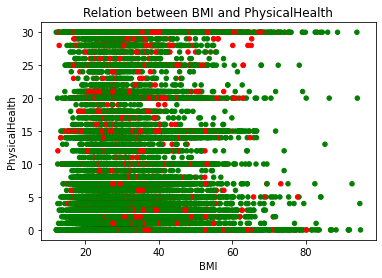

In [16]:
data.plot(x='BMI',
          y='PhysicalHealth',
          title='Relation between BMI and PhysicalHealth',
          kind='scatter',
          c=colors,
          legend=['Yes','No'])

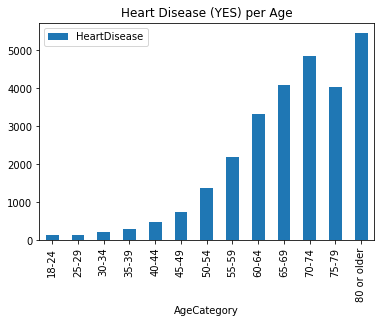

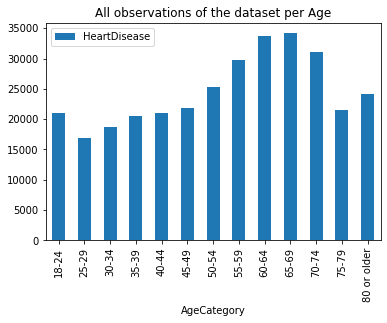

In [17]:
data[data['HeartDisease'] == 'Yes'].groupby('AgeCategory').agg({'HeartDisease':'count'}).plot(kind='bar', title='Heart Disease (YES) per Age')
data.groupby('AgeCategory').agg({'HeartDisease':'count'}).plot(kind='bar', title='All observations of the dataset per Age')

In [18]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

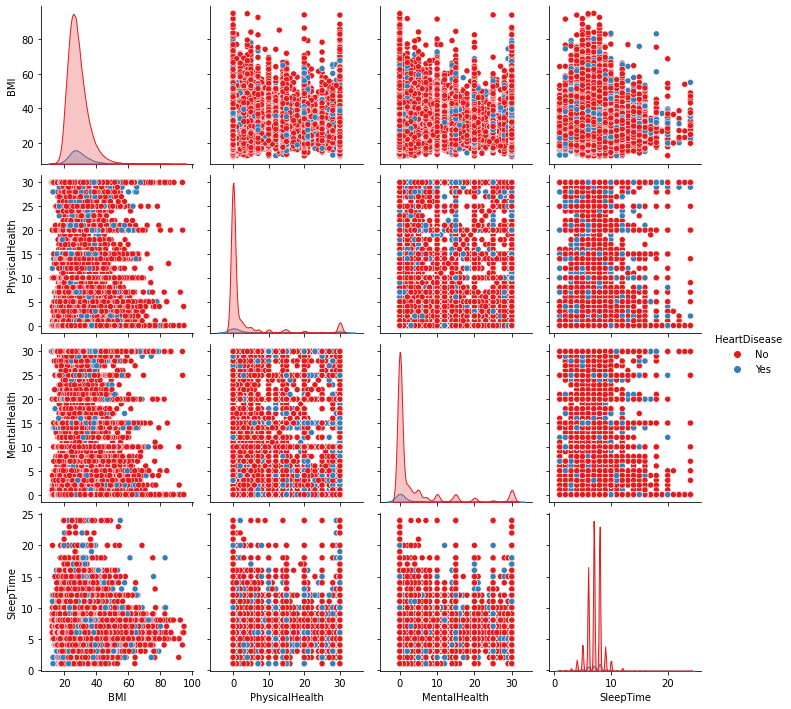

In [19]:
sns.pairplot(data=data, hue='HeartDisease', palette='Set1')

**Data Transformation**

In [20]:
le = LabelEncoder()

In [21]:
data_transformed = data

In [22]:
data_transformed.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

For all the columns that are categorial and nominal I'll simply use the label encoder. Others i thread with IF

In [23]:
data_transformed['HeartDisease'] = le.fit_transform(data_transformed['HeartDisease'])
data_transformed['Stroke'] = le.fit_transform(data_transformed['Stroke'])
data_transformed['Smoking'] = le.fit_transform(data_transformed['Smoking'])
data_transformed['AlcoholDrinking'] = le.fit_transform(data_transformed['AlcoholDrinking'])
data_transformed['Stroke'] = le.fit_transform(data_transformed['Stroke'])
data_transformed['DiffWalking'] = le.fit_transform(data_transformed['DiffWalking'])
data_transformed['Sex'] = le.fit_transform(data_transformed['Sex'])
data_transformed['Race'] = le.fit_transform(data_transformed['Race'])
data_transformed['Diabetic'] = le.fit_transform(data_transformed['Diabetic'])
data_transformed['PhysicalActivity'] = le.fit_transform(data_transformed['PhysicalActivity'])
data_transformed['Asthma'] = le.fit_transform(data_transformed['Asthma'])
data_transformed['KidneyDisease'] = le.fit_transform(data_transformed['KidneyDisease'])
data_transformed['SkinCancer'] = le.fit_transform(data_transformed['SkinCancer'])
data_transformed.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,5,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,5,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,5,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,5,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,5,0,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,75-79,2,0,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,70-74,5,0,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80 or older,5,2,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,80 or older,5,1,0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,65-69,5,0,1,Good,10.0,0,0,0


In [24]:
age_counted = data_transformed['AgeCategory'].value_counts(sort=True)

In [25]:
age_counted.sort_index()

18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: AgeCategory, dtype: int64

In [27]:
for lab, row in data_transformed.iterrows() :
  if row['AgeCategory'] == '18-24' : row['AgeCategory'] = 0 
  elif row['AgeCategory'] == '25-29' : row['AgeCategory'] = 1 
  elif row['AgeCategory'] == '30-34' : row['AgeCategory'] = 2 
  elif row['AgeCategory'] == '35-39' : row['AgeCategory'] = 3 
  elif row['AgeCategory'] == '40-44' : row['AgeCategory'] = 4 
  elif row['AgeCategory'] == '45-49' : row['AgeCategory'] = 5 
  elif row['AgeCategory'] == '50-54' : row['AgeCategory'] = 6 
  elif row['AgeCategory'] == '55-59' : row['AgeCategory'] = 7 
  elif row['AgeCategory'] == '60-64' : row['AgeCategory'] = 8 
  elif row['AgeCategory'] == '65-69' : row['AgeCategory'] = 9 
  elif row['AgeCategory'] == '70-74' : row['AgeCategory'] = 10 
  elif row['AgeCategory'] == '75-79' : row['AgeCategory'] = 11
  else: row['AgeCategory'] = 12

In [28]:
AgeNumber = []

In [29]:
for lab, row in data_transformed.iterrows() :
  if row['AgeCategory'] == '18-24' : AgeNumber.append(0) 
  elif row['AgeCategory'] == '25-29' : AgeNumber.append(1) 
  elif row['AgeCategory'] == '30-34' : AgeNumber.append(2) 
  elif row['AgeCategory'] == '35-39' : AgeNumber.append(3) 
  elif row['AgeCategory'] == '40-44' : AgeNumber.append(4) 
  elif row['AgeCategory'] == '45-49' : AgeNumber.append(5) 
  elif row['AgeCategory'] == '50-54' : AgeNumber.append(6) 
  elif row['AgeCategory'] == '55-59' : AgeNumber.append(7) 
  elif row['AgeCategory'] == '60-64' : AgeNumber.append(8) 
  elif row['AgeCategory'] == '65-69' : AgeNumber.append(9) 
  elif row['AgeCategory'] == '70-74' : AgeNumber.append(10) 
  elif row['AgeCategory'] == '75-79' : AgeNumber.append(11)
  else: row['AgeCategory'] = AgeNumber.append(12)

In [30]:
AgeNumber[0:10]

[7, 12, 9, 11, 4, 11, 10, 12, 12, 9]

In [31]:
data_transformed['AgeCategory'] = AgeNumber

In [32]:
data_transformed['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [33]:
GenHealth = []

for lab, row in data_transformed.iterrows() :
  if row['GenHealth'] == 'poor' : GenHealth.append(0)
  elif row['GenHealth'] == 'Fair' : GenHealth.append(1)
  elif row['GenHealth'] == 'Good' : GenHealth.append(2)
  elif row['GenHealth'] == 'Very Good' : GenHealth.append(3)
  else : GenHealth.append(4)


In [34]:
data_transformed['GenHealth'] = GenHealth

In [35]:
data_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


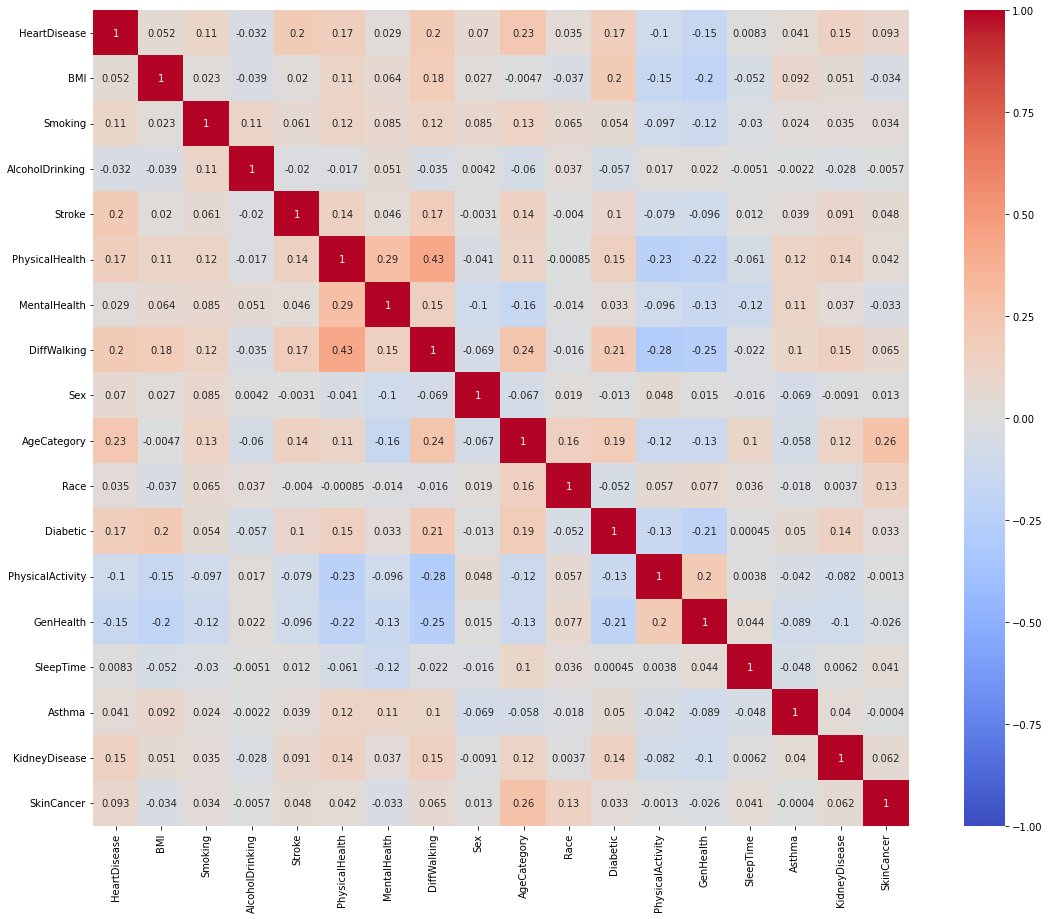

In [36]:
corr = data_transformed.corr()
graph = sns.heatmap(corr, vmax=1,vmin=-1, center=0,square=True, cmap='coolwarm', annot=True)
graph.figure.set_size_inches(20,15)

**Spliting into test and training and model training and fiting**

In [37]:
predict_var = data.iloc[:,1:18].values
target_var = data.iloc[:,0].values

In [38]:
x_training, x_testing, y_training, y_testing = train_test_split(predict_var,
                                                             target_var,
                                                             test_size=0.3,
                                                             random_state=0)

In [39]:
dTree = DecisionTreeClassifier()


In [40]:
dTree.fit(x_training, y_training)

DecisionTreeClassifier()

**Model Visualization**

In [41]:
#this will export to the project file a file named tree which you can go to http://webgraphviz.com/ and paste the content of the file
#and you'll visualize your tree

export_graphviz(dTree, out_file='tree.dot')

In [43]:
predictions = dTree.predict(x_testing)
predictions

array([0, 0, 0, ..., 1, 0, 0])

**Model Evaluation**

In [44]:
confusionmatrix = confusion_matrix(y_testing, predictions)
confusionmatrix

array([[80943,  6787],
       [ 6253,  1956]])

In [45]:
accuracy = accuracy_score(y_testing, predictions)
accuracy

0.8640803010246094

In [46]:
error = 1 - accuracy
error

0.13591969897539058

In [47]:
print('Accuracy = '+ str(accuracy))
print('Error = ' + str(error))

Accuracy = 0.8640803010246094
Error = 0.13591969897539058


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


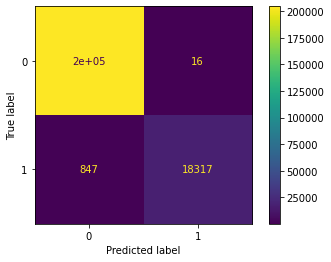

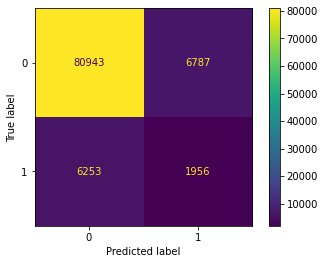

In [48]:
plot_confusion_matrix(dTree, x_training, y_training)
plot_confusion_matrix(dTree, x_testing, y_testing)